# 1-import the libraries important  to work  

In [27]:
import numpy as np
import pandas as pd

from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold, cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt


# 2 -- Loading data  into a DataFrame using a pd.read_csv()

In [113]:
dataset_interpol = pd.read_csv('/content/WildFires_DataSet_a_interpoler.csv',sep=";")


In [54]:
dataset_interpol2 = pd.read_csv('/content/WildFires_DataSet_a_interpoler.csv',sep=";")

#  **3-- Data Exploration :**

### a-- Summary statistics

In [29]:
#number of row and coloumn
dataset_interpol.shape

(1713, 4)

In [30]:
# # Get basic info about the dataset
dataset_interpol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NDVI         1636 non-null   float64
 1   LST          1668 non-null   float64
 2   BURNED_AREA  1667 non-null   float64
 3   CLASS        1713 non-null   object 
dtypes: float64(3), object(1)
memory usage: 53.7+ KB


In [31]:
#get mean and min and max...
dataset_interpol.describe()

,NDVI,LST,BURNED_AREA
count,1636.000000,1668.000000,1667.000000
mean,0.555346,14620.883140,4.674627
std,0.093223,365.701396,0.584025
min,0.030735,13137.000000,3.000000
25%,0.500080,14402.670779,4.519508
50%,0.564792,14644.124439,4.916339
75%,0.622227,14875.508123,5.000000
max,0.781723,15611.570513,9.000000


In [32]:
dataset_interpol.groupby('CLASS').mean()

,NDVI,LST,BURNED_AREA
CLASS,,,
fire,0.533820,14818.074189,4.759683
no_fire,0.561593,14563.101577,4.649855


In [33]:
#checking the distribution of rows
dataset_interpol['CLASS'].value_counts()

CLASS
no_fire    1327
fire        386
Name: count, dtype: int64

### b-- Data visualization

In [34]:
#show first 5 ligne
dataset_interpol.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,NaN,13298.500000,3.500000,no_fire
4,NaN,14743.000000,5.000000,no_fire


In [35]:
#show last 5 ligne
dataset_interpol.tail()

,NDVI,LST,BURNED_AREA,CLASS
1708,0.621721,14406.000000,5.000000,no_fire
1709,0.709715,14330.400000,4.851852,no_fire
1710,0.613000,14751.500000,3.000000,fire
1711,0.614471,13611.000000,4.921053,no_fire
1712,0.549497,14269.777778,5.000000,fire


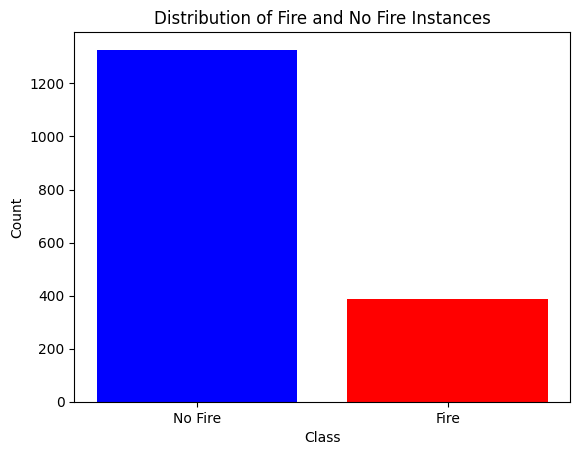

In [36]:
# plot Data
class_counts = {'No Fire': 1327, 'Fire': 386}

# Create a bar plot
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Fire and No Fire Instances')

# Show plot
plt.show()

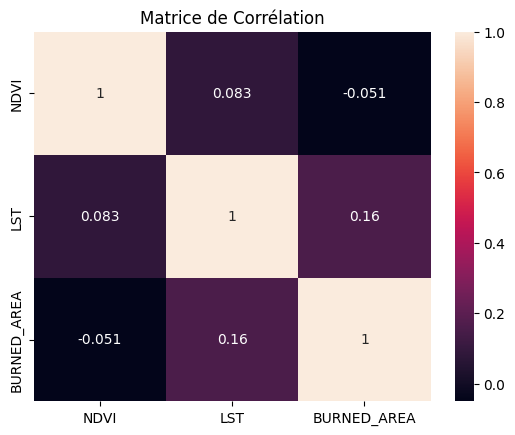

In [37]:
correlation_matrix = dataset_interpol.select_dtypes(include=[np.number]).corr()

    # Affichage de la matrice de corrélation avec seaborn
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matrice de Corrélation')
plt.show()

# **4 -- Data preprocessing :**

## **a-Detecting Missing values**


*  Detecting missing values numerically
---
The first step is to detect the count/percentage of missing values in every column of the dataset. This will give an idea about the distribution of missing values.












In [38]:
#checking missing values
dataset_interpol.isnull().sum()

NDVI           77
LST            45
BURNED_AREA    46
CLASS           0
dtype: int64

In [41]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [42]:
missingV= missing_values_table(dataset_interpol)
missingV

Your selected dataframe has 4 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
NDVI,77,4.5
BURNED_AREA,46,2.7
LST,45,2.6


*   Detecting missing data visually using Missingno library

---
To graphically analyse the missingness of the data, let's use a library called Missingno It is a package for graphical analysis of missing values. To use this library, we need to import it as follows: import missingno as msno


<Axes: >

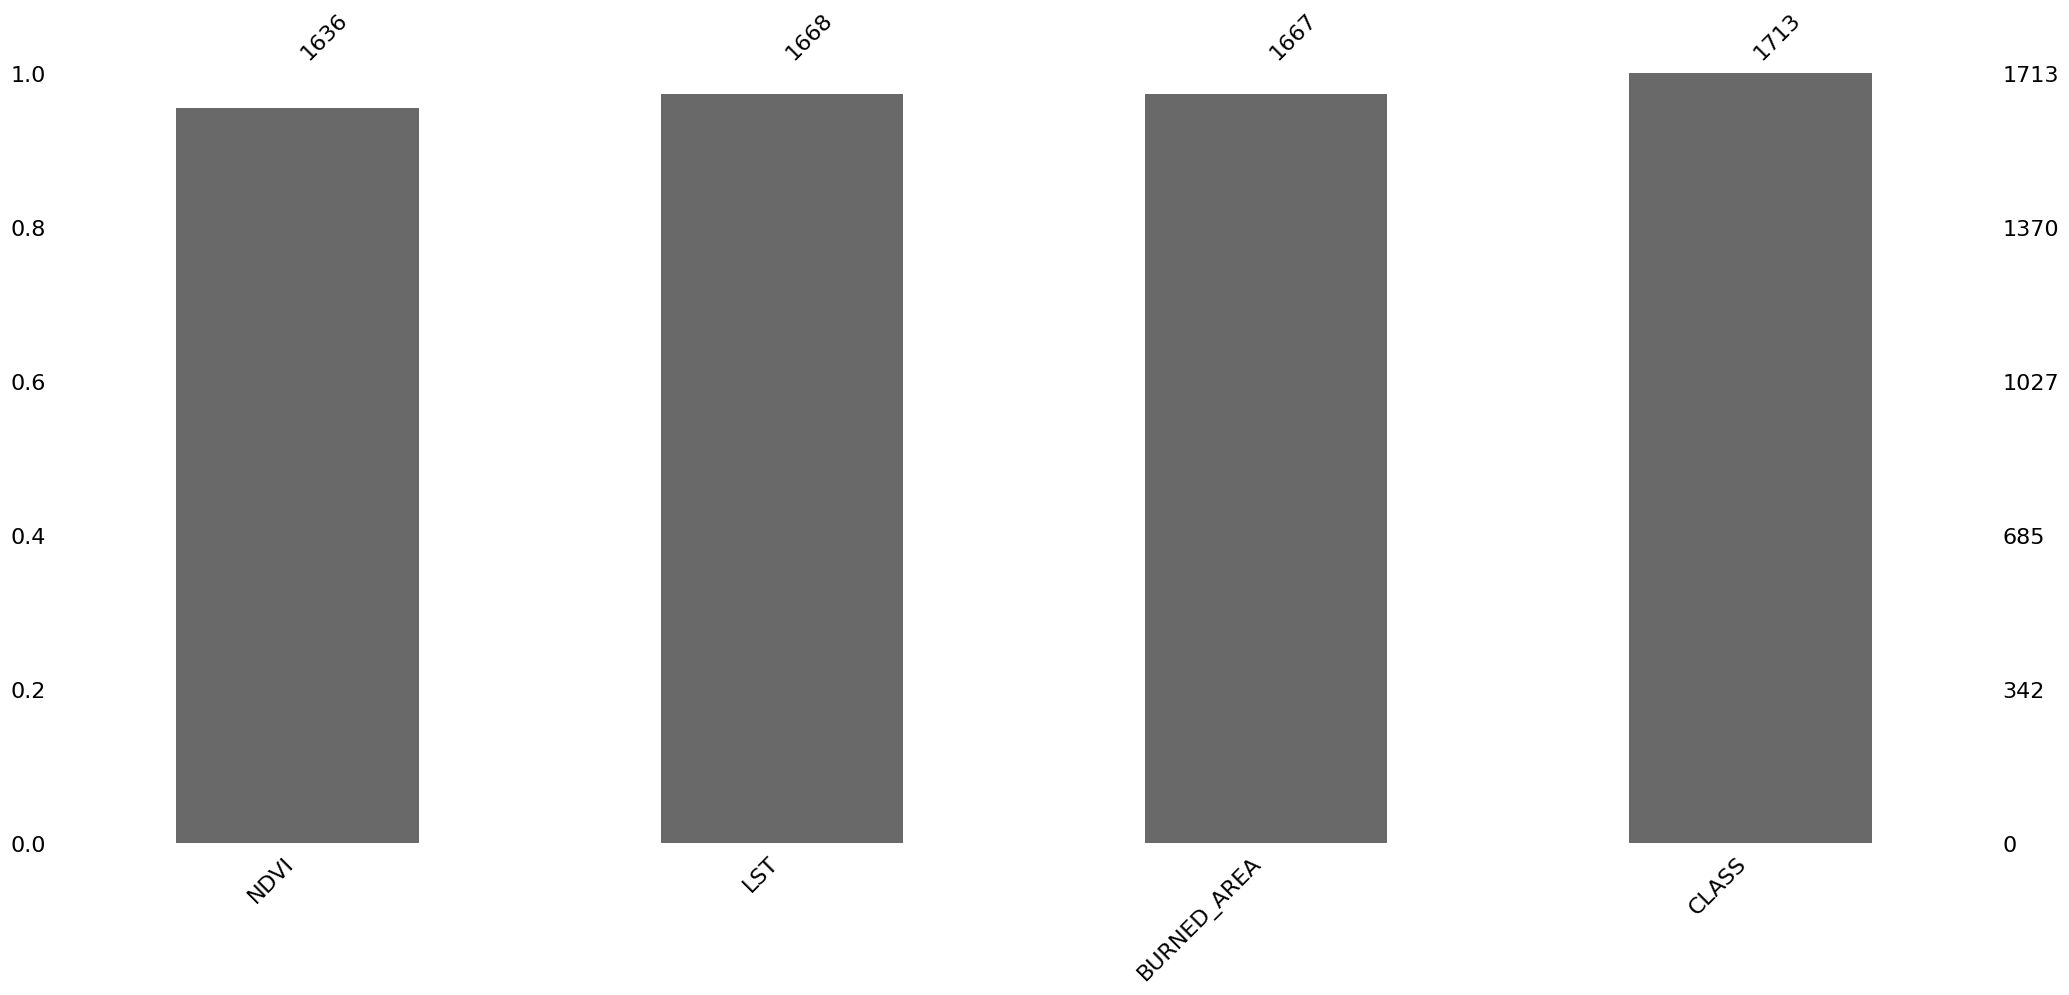

In [43]:
import missingno as msno
msno.bar(dataset_interpol)


The bar chart above gives a quick graphical overview of the completeness of the dataset. We can see that BURNED_AREA, LST  and NDVI  columns have missing values. Next,it would make sense to find out the locations of the missing data.

---




* Visualizing the locations of the missing data


---
The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

<Axes: >

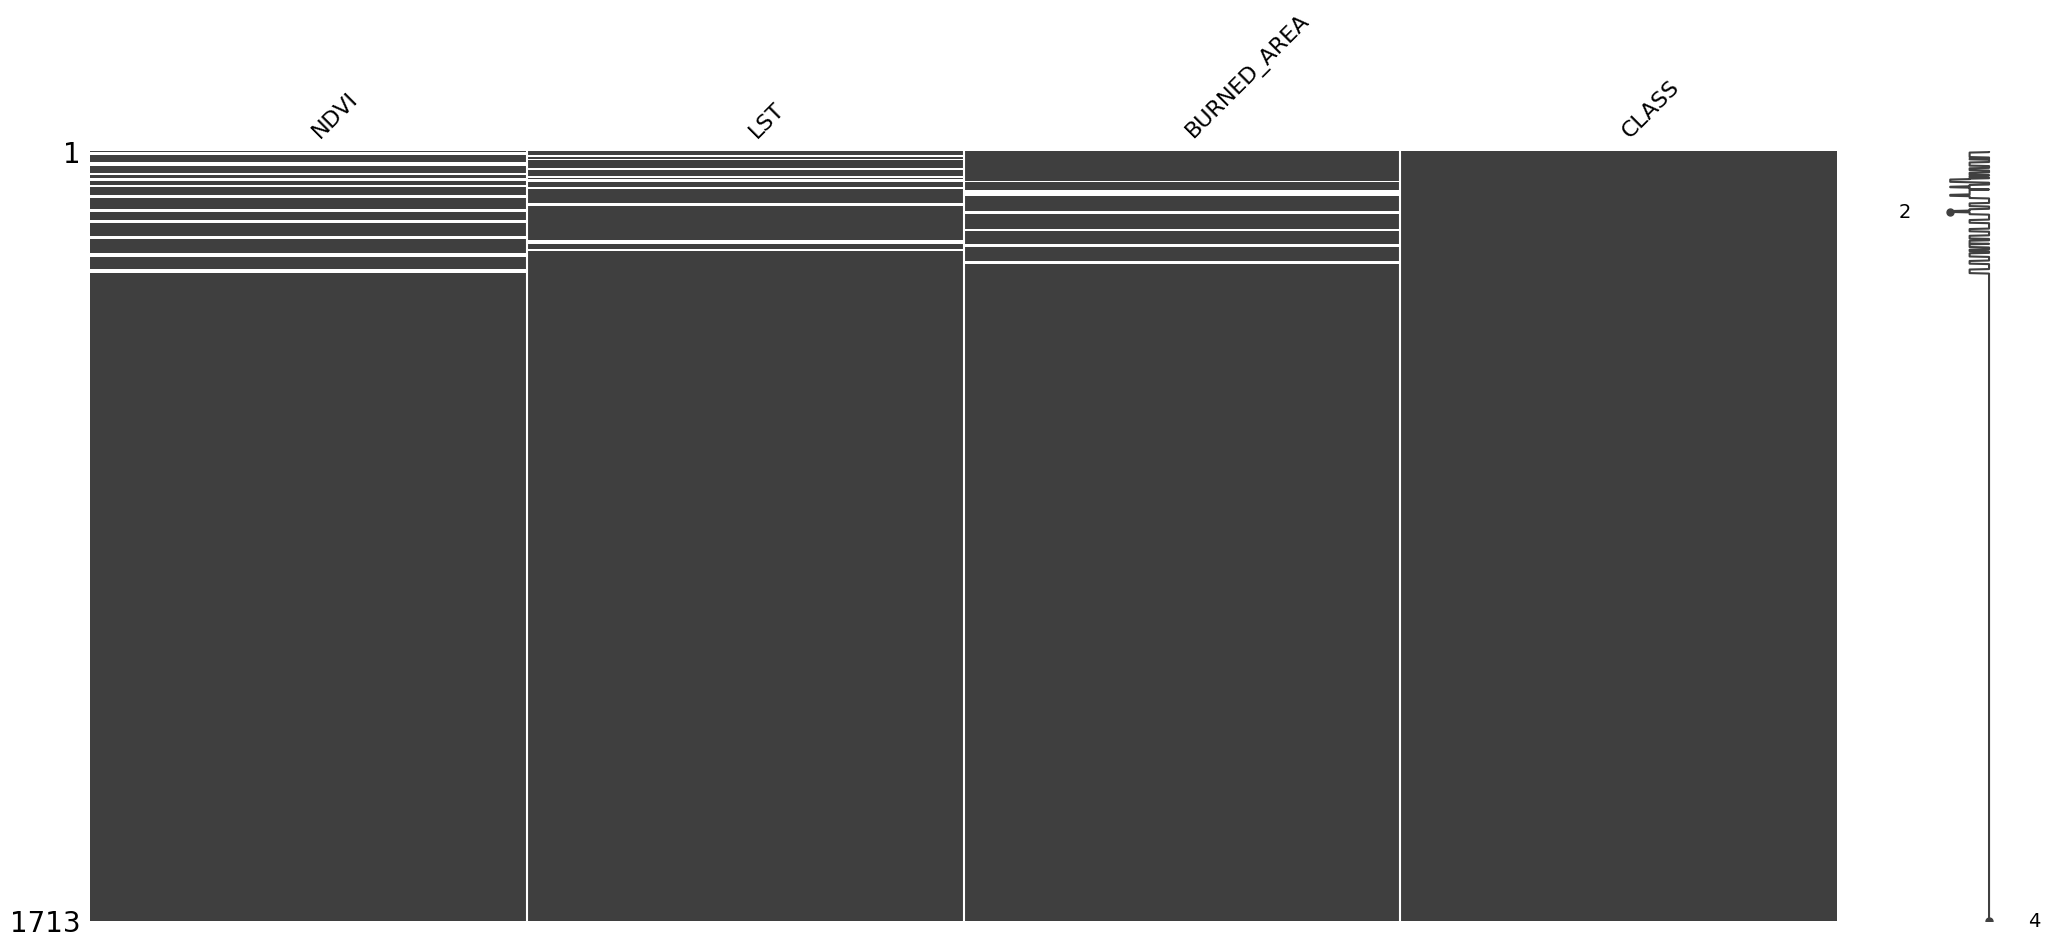

In [45]:
msno.matrix(dataset_interpol)

<Axes: >

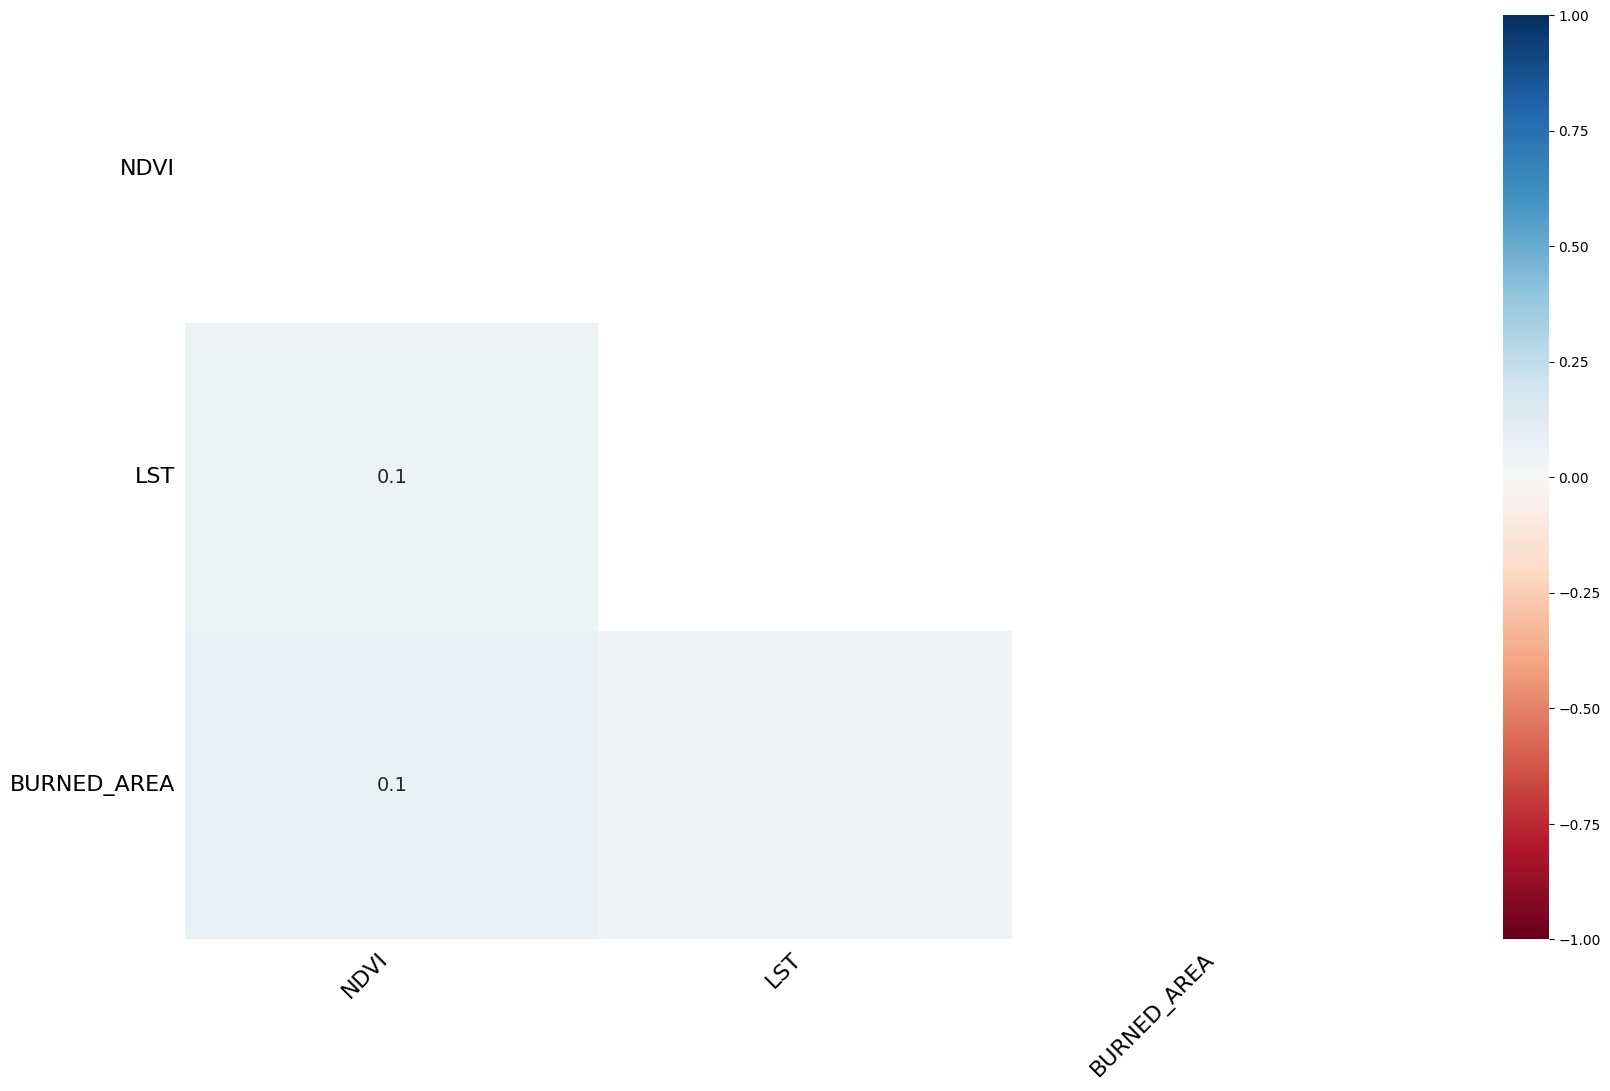

In [46]:
#Finding reason for missing data using a Heatmap

msno.heatmap(dataset_interpol)

<Axes: >

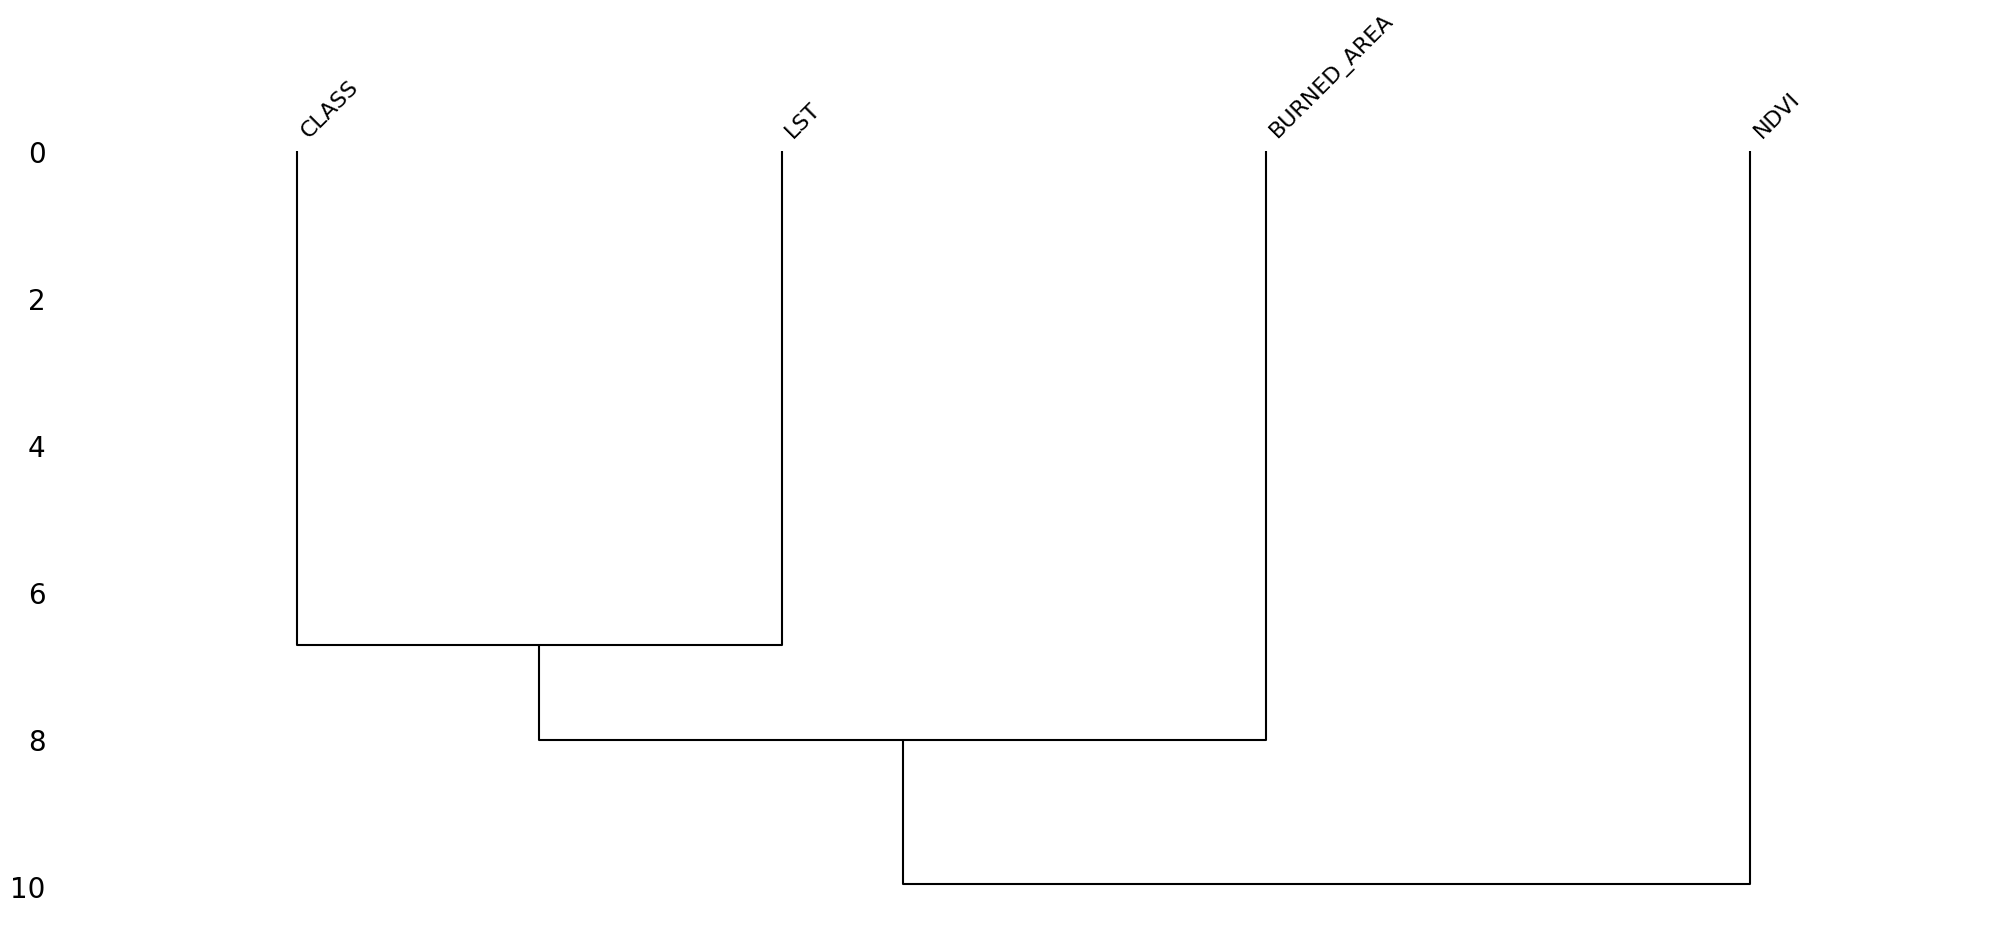

In [50]:
#Finding reason for missing data using Dendrogram
#A dendogram is a tree diagram of missingness. It groups the highly correlated variables together.
msno.dendrogram(dataset_interpol)

## **b-Imputation using  Interpolation methods**

In [58]:
import pandas as pd

# Assuming your dataset is in a DataFrame named 'dataset_interpol2'
# Replace empty strings with NaN
dataset_interpol2.replace('', pd.NA, inplace=True)

# Convert object columns to numeric
dataset_interpol2['NDVI'] = pd.to_numeric(dataset_interpol2['NDVI'], errors='coerce')
dataset_interpol2['LST'] = pd.to_numeric(dataset_interpol2['LST'], errors='coerce')
dataset_interpol2['BURNED_AREA'] = pd.to_numeric(dataset_interpol2['BURNED_AREA'], errors='coerce')

# Calculate correlation coefficients before interpolation
correlation_before = dataset_interpol2[['NDVI', 'LST', 'BURNED_AREA']].corr()

# Interpolate missing values using linear interpolation
dataset_interpol2_linear = dataset_interpol2.sort_values('CLASS').interpolate(method='linear')

# Interpolate missing values using spline interpolation
dataset_interpol2_spline = dataset_interpol2.interpolate(method='spline', order=3)



# Interpolate missing values using cubic interpolation
dataset_interpol2_cubic = dataset_interpol2.sort_values('CLASS').interpolate(method='cubic')

# Calculate correlation coefficients after interpolation
correlation_linear = dataset_interpol2_linear[['NDVI', 'LST', 'BURNED_AREA']].corr()
correlation_cubic = dataset_interpol2_cubic[['NDVI', 'LST', 'BURNED_AREA']].corr()
# Calculate correlation coefficients after spline interpolation
correlation_spline = dataset_interpol2_spline[['NDVI', 'LST', 'BURNED_AREA']].corr()

print("Correlation before interpolation:")
print(correlation_before)
print("\nCorrelation after linear interpolation:")
print(correlation_linear)
print("\nCorrelation after cubic interpolation:")
print(correlation_cubic)
print("\nCorrelation after spline interpolation:")
print(correlation_spline)


Correlation before interpolation:
                 NDVI       LST  BURNED_AREA
NDVI         1.000000  0.082864    -0.050513
LST          0.082864  1.000000     0.158154
BURNED_AREA -0.050513  0.158154     1.000000

Correlation after linear interpolation:
                 NDVI       LST  BURNED_AREA
NDVI         1.000000  0.077507    -0.043446
LST          0.077507  1.000000     0.153010
BURNED_AREA -0.043446  0.153010     1.000000

Correlation after cubic interpolation:
                 NDVI       LST  BURNED_AREA
NDVI         1.000000  0.059739    -0.030035
LST          0.059739  1.000000     0.114656
BURNED_AREA -0.030035  0.114656     1.000000

Correlation after spline interpolation:
                 NDVI       LST  BURNED_AREA
NDVI         1.000000  0.080734    -0.048410
LST          0.080734  1.000000     0.150221
BURNED_AREA -0.048410  0.150221     1.000000


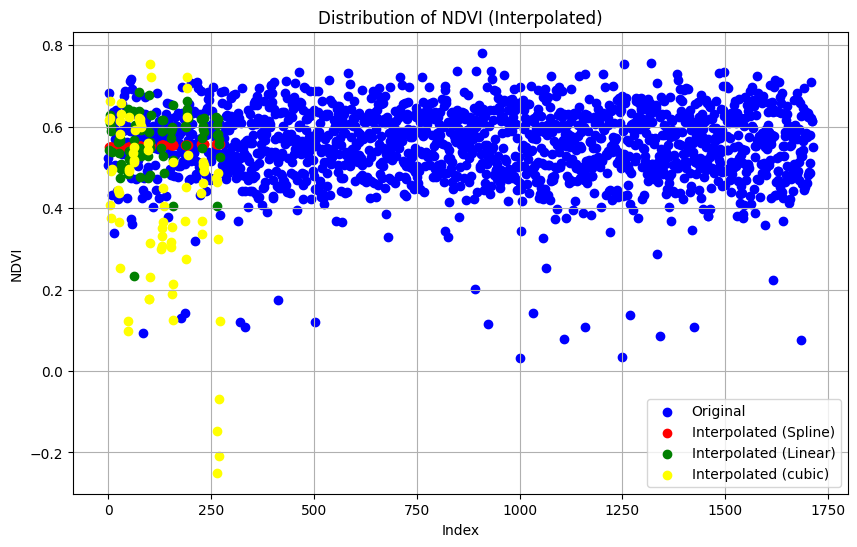

In [90]:
import matplotlib.pyplot as plt

# Get indices of missing values in the original NDVI data
missing_indices2 = dataset_interpol2['NDVI'].isnull()

# Plot original and interpolated NDVI values
plt.figure(figsize=(10, 6))
plt.scatter(dataset_interpol2.index, dataset_interpol2['NDVI'], c='blue', label='Original')
plt.scatter(dataset_interpol2[missing_indices2].index, dataset_interpol2_spline['NDVI'][missing_indices2], c='red', label='Interpolated (Spline)')
plt.scatter(dataset_interpol2[missing_indices2].index, dataset_interpol2_linear['NDVI'][missing_indices2], c='green', label='Interpolated (Linear)')
plt.scatter(dataset_interpol2[missing_indices2].index, dataset_interpol2_cubic['NDVI'][missing_indices2], c='yellow', label='Interpolated (cubic)')
plt.title('Distribution of NDVI (Interpolated)')
plt.xlabel('Index')
plt.ylabel('NDVI')
plt.legend()
plt.grid(True)
plt.show()


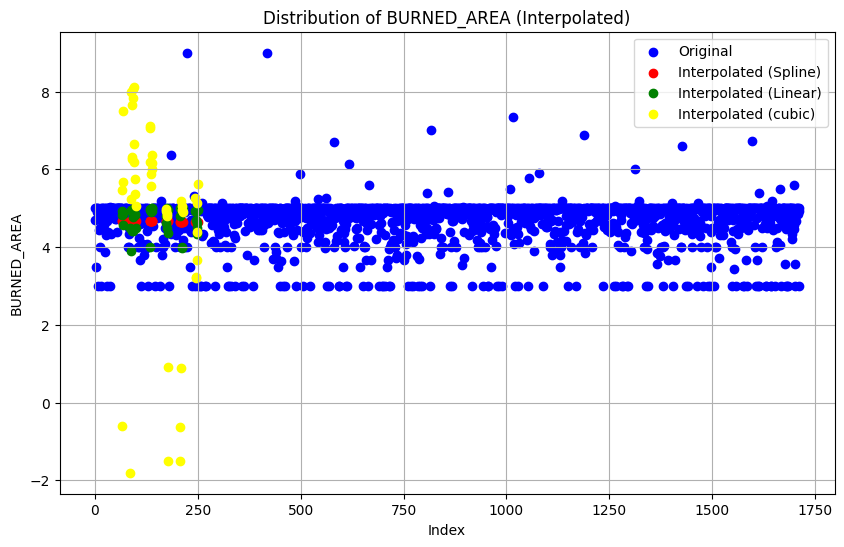

In [91]:
import matplotlib.pyplot as plt

# Get indices of missing values in the original NDVI data
missing_indices2 = dataset_interpol2['BURNED_AREA'].isnull()

# Plot original and interpolated BURNED_AREA values
plt.figure(figsize=(10, 6))
plt.scatter(dataset_interpol2.index, dataset_interpol2['BURNED_AREA'], c='blue', label='Original')
plt.scatter(dataset_interpol2[missing_indices2].index, dataset_interpol2_spline['BURNED_AREA'][missing_indices2], c='red', label='Interpolated (Spline)')
plt.scatter(dataset_interpol2[missing_indices2].index, dataset_interpol2_linear['BURNED_AREA'][missing_indices2], c='green', label='Interpolated (Linear)')
plt.scatter(dataset_interpol2[missing_indices2].index, dataset_interpol2_cubic['BURNED_AREA'][missing_indices2], c='yellow', label='Interpolated (cubic)')
plt.title('Distribution of BURNED_AREA (Interpolated)')
plt.xlabel('Index')
plt.ylabel('BURNED_AREA')
plt.legend()
plt.grid(True)
plt.show()


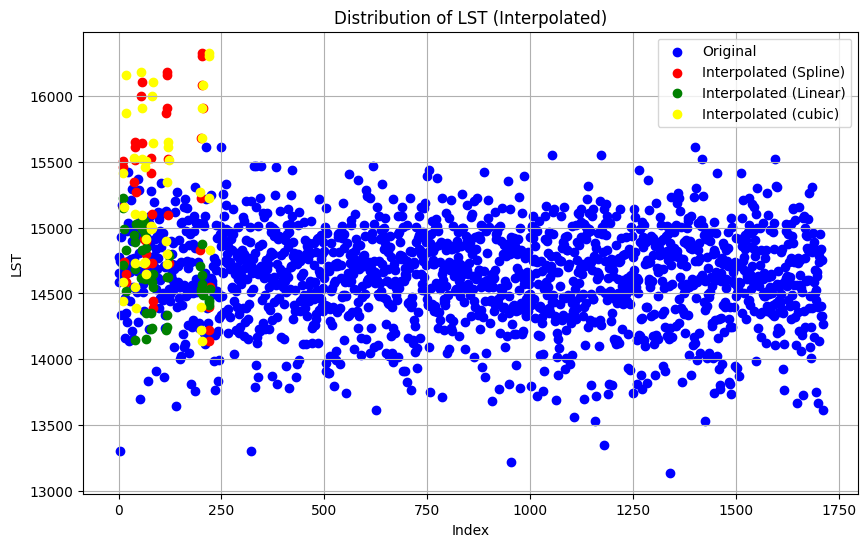

In [92]:
import matplotlib.pyplot as plt

# Get indices of missing values in the original NDVI data
missing_indices2 = dataset_interpol2['LST'].isnull()

# Plot original and interpolated LST values
plt.figure(figsize=(10, 6))
plt.scatter(dataset_interpol2.index, dataset_interpol2['LST'], c='blue', label='Original')
plt.scatter(dataset_interpol2[missing_indices2].index, dataset_interpol2_spline['LST'][missing_indices2], c='red', label='Interpolated (Spline)')
plt.scatter(dataset_interpol2[missing_indices2].index, dataset_interpol2_linear['LST'][missing_indices2], c='green', label='Interpolated (Linear)')
plt.scatter(dataset_interpol2[missing_indices2].index, dataset_interpol2_cubic['LST'][missing_indices2], c='yellow', label='Interpolated (cubic)')
plt.title('Distribution of LST (Interpolated)')
plt.xlabel('Index')
plt.ylabel('LST')
plt.legend()
plt.grid(True)
plt.show()


## **c-Imputation using Linear Interpolation method**

---
Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point


this method which we will use it in this project


In [114]:
# Interpolate missing values using linear interpolation
dataset_interpol_linear = dataset_interpol.interpolate(method='linear')

In [115]:
missingV2= missing_values_table(dataset_interpol_linear)
missingV2

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [116]:
#checking missing values
dataset_interpol_linear.isnull().sum()

NDVI           0
LST            0
BURNED_AREA    0
CLASS          0
dtype: int64

## **d-split data**

In [117]:
# Replace class labels with 0 and 1
dataset_interpol_linear['CLASS'] = dataset_interpol_linear['CLASS'].map({'fire': 1, 'no_fire': 0})

separating  the  features x and target  y

In [118]:
#separating  the  features and target
#x = dataset.drop('CLASS',axis = 1)
#y = dataset.CLASS

#we can also use this forms:
x = dataset_interpol_linear[["NDVI", "LST", "BURNED_AREA"]]
y = dataset_interpol_linear["CLASS"]

#or
#x = dataset.iloc[:,:-1]
#y = dataset.iloc[:,-1]

x.head()

,NDVI,LST,BURNED_AREA
0,0.506782,14584.272727,4.692308
1,0.522150,14655.833333,5.000000
2,0.682284,14780.000000,5.000000
3,0.651151,13298.500000,3.500000
4,0.620017,14743.000000,5.000000


In [119]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: CLASS, dtype: int64

In [ ]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [ ]:
print('dimension of X',X.shape)
print('dimension of y',y.shape ,end = '\n ')

dimension of X (1713, 3)
dimension of y (1713,)
 

4.Data division: here we will  divided Data to  training data  and test data  


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.35,random_state=4)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1199, 3)
(514, 3)
(1199,)
(514,)


# **5 -- Creation of  models :**

In [ ]:
performance_Accuracy ={}
def test_algorithm(model, x_train, y_train, x_test, y_test):

    # Train the model
    model.fit(x_train, y_train)

    # Predict on test set
    y_pred = model.predict(x_test)

    # Calculate performance metrics
    print("évaluer  performance: \n")

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc} \n")

    prec = precision_score(y_test, y_pred)
    print(f"Precision: {prec} \n")

    rec = recall_score(y_test, y_pred)
    print(f"Recall: {rec} \n")

    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1} \n")

    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix: {cm} \n")

    fn,fp, tn, tp = cm.ravel()
    print(f"True Positive : {tp} ; False Negative:  {fn} ; True Negative : {tn} ; False Positive : {fp}")

    print("\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False, True])
    cm_display.plot()
    plt.show()

    print("\n")
    report = classification_report(y_test, y_pred)
    print(f"Classification Report: {report} \n")

    # Create a dictionary to store performance metrics
    performance_Accuracy[model]=acc




### **1- Arbres de décision (J48)**

In [ ]:
DecisionTree = DecisionTreeClassifier()

 Decision Tree :

évaluer  performance: 

Accuracy: 0.7762645914396887 

Precision: 0.48717948717948717 

Recall: 0.5089285714285714 

F1 Score: 0.4978165938864628 

Confusion Matrix: [[342  60]
 [ 55  57]] 

True Positive : 57 ; False Negative:  342 ; True Negative : 55 ; False Positive : 60




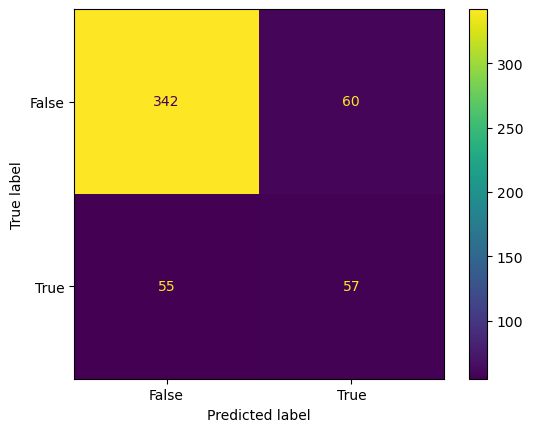



Classification Report:               precision    recall  f1-score   support

           0       0.86      0.85      0.86       402
           1       0.49      0.51      0.50       112

    accuracy                           0.78       514
   macro avg       0.67      0.68      0.68       514
weighted avg       0.78      0.78      0.78       514
 



In [ ]:
# Display performance metrics
print(" Decision Tree :\n")
test_algorithm(DecisionTree,x_train, y_train, x_test, y_test)

### **2- Forêts aléatoires (Random Forest)**

In [ ]:
RandomForest = RandomForestClassifier()

 Random Forest :

évaluer  performance: 

Accuracy: 0.8326848249027238 

Precision: 0.6805555555555556 

Recall: 0.4375 

F1 Score: 0.532608695652174 

Confusion Matrix: [[379  23]
 [ 63  49]] 

True Positive : 49 ; False Negative:  379 ; True Negative : 63 ; False Positive : 23




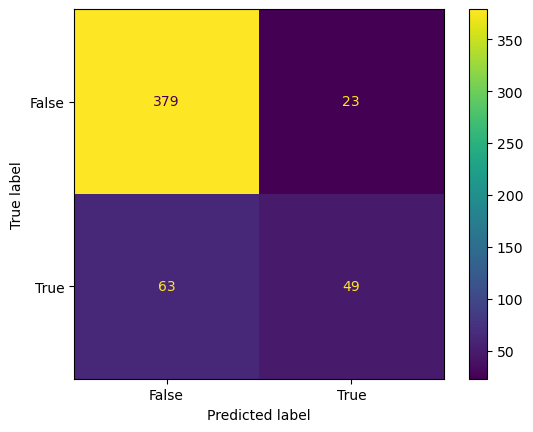



Classification Report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90       402
           1       0.68      0.44      0.53       112

    accuracy                           0.83       514
   macro avg       0.77      0.69      0.72       514
weighted avg       0.82      0.83      0.82       514
 



In [ ]:
# Display performance metrics
print(" Random Forest :\n")
test_algorithm(RandomForest,x_train, y_train, x_test, y_test)

### **3- k plus proches voisins (k-NN)**

In [ ]:
kNN = KNeighborsClassifier()

 k plus proches voisins :

évaluer  performance: 

Accuracy: 0.7626459143968871 

Precision: 0.4358974358974359 

Recall: 0.30357142857142855 

F1 Score: 0.35789473684210527 

Confusion Matrix: [[358  44]
 [ 78  34]] 

True Positive : 34 ; False Negative:  358 ; True Negative : 78 ; False Positive : 44




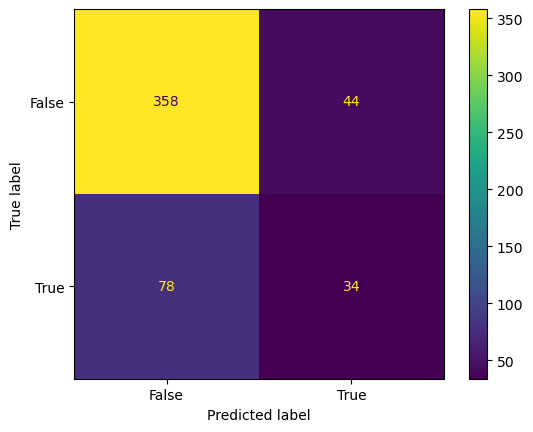



Classification Report:               precision    recall  f1-score   support

           0       0.82      0.89      0.85       402
           1       0.44      0.30      0.36       112

    accuracy                           0.76       514
   macro avg       0.63      0.60      0.61       514
weighted avg       0.74      0.76      0.75       514
 



In [ ]:
# Display performance metrics
print(" k plus proches voisins :\n")
test_algorithm(kNN,x_train, y_train, x_test, y_test)

### **4- Naive Bayes**

In [ ]:
NaiveBayes=GaussianNB()

 Naive Bayes :

évaluer  performance: 

Accuracy: 0.7704280155642024 

Precision: 0.3125 

Recall: 0.044642857142857144 

F1 Score: 0.078125 

Confusion Matrix: [[391  11]
 [107   5]] 

True Positive : 5 ; False Negative:  391 ; True Negative : 107 ; False Positive : 11




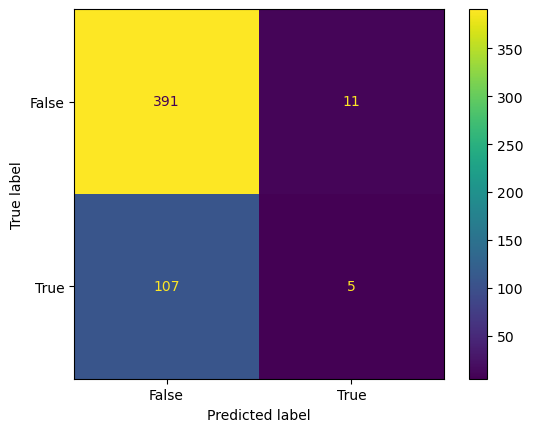



Classification Report:               precision    recall  f1-score   support

           0       0.79      0.97      0.87       402
           1       0.31      0.04      0.08       112

    accuracy                           0.77       514
   macro avg       0.55      0.51      0.47       514
weighted avg       0.68      0.77      0.70       514
 



In [ ]:
# Display performance metrics
print(" Naive Bayes :\n")
test_algorithm(NaiveBayes,x_train, y_train, x_test, y_test)

### **5-Machines à vecteurs de support (SVM)**

In [ ]:
SVM = SVC()

  support vecteurs  Machines:

évaluer  performance: 

Accuracy: 0.791828793774319 

Precision: 0.7777777777777778 

Recall: 0.0625 

F1 Score: 0.11570247933884298 

Confusion Matrix: [[400   2]
 [105   7]] 

True Positive : 7 ; False Negative:  400 ; True Negative : 105 ; False Positive : 2




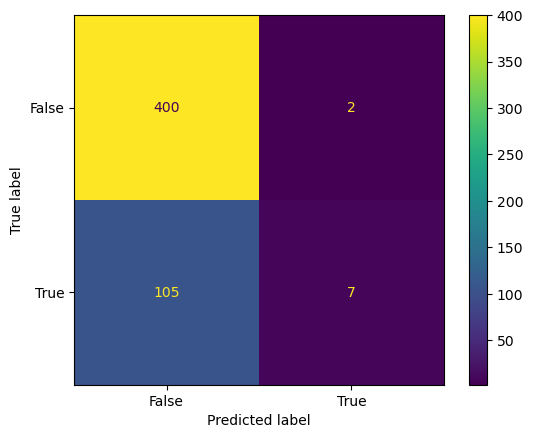



Classification Report:               precision    recall  f1-score   support

           0       0.79      1.00      0.88       402
           1       0.78      0.06      0.12       112

    accuracy                           0.79       514
   macro avg       0.78      0.53      0.50       514
weighted avg       0.79      0.79      0.72       514
 



In [ ]:
# Display performance metrics
print("  support vecteurs  Machines:\n")
test_algorithm(SVM,x_train, y_train, x_test, y_test)

### **6-Réseaux de neurones artificiels (Multilayer Perceptron)**


In [ ]:
MLP= MLPClassifier()

 Réseaux de neurones artificiels :

évaluer  performance: 

Accuracy: 0.791828793774319 

Precision: 0.5862068965517241 

Recall: 0.15178571428571427 

F1 Score: 0.2411347517730496 

Confusion Matrix: [[390  12]
 [ 95  17]] 

True Positive : 17 ; False Negative:  390 ; True Negative : 95 ; False Positive : 12




C:\Users\smi\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


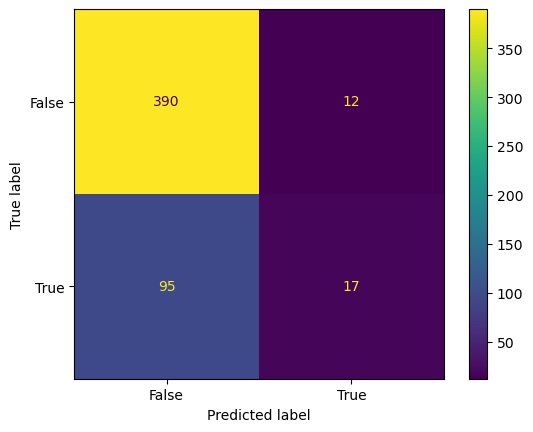



Classification Report:               precision    recall  f1-score   support

           0       0.80      0.97      0.88       402
           1       0.59      0.15      0.24       112

    accuracy                           0.79       514
   macro avg       0.70      0.56      0.56       514
weighted avg       0.76      0.79      0.74       514
 



In [ ]:
# Display performance metrics
print(" Réseaux de neurones artificiels :\n")
test_algorithm(MLP,x_train, y_train, x_test, y_test)

## **E-meilleures performances**

In [ ]:
for x,y in performance_Accuracy.items():
   print(x,y)

DecisionTreeClassifier() 0.7762645914396887
RandomForestClassifier() 0.8326848249027238
KNeighborsClassifier() 0.7626459143968871
GaussianNB() 0.7704280155642024
SVC() 0.791828793774319
MLPClassifier() 0.791828793774319


In [ ]:
performance_Accuracy[DecisionTree]

0.7762645914396887

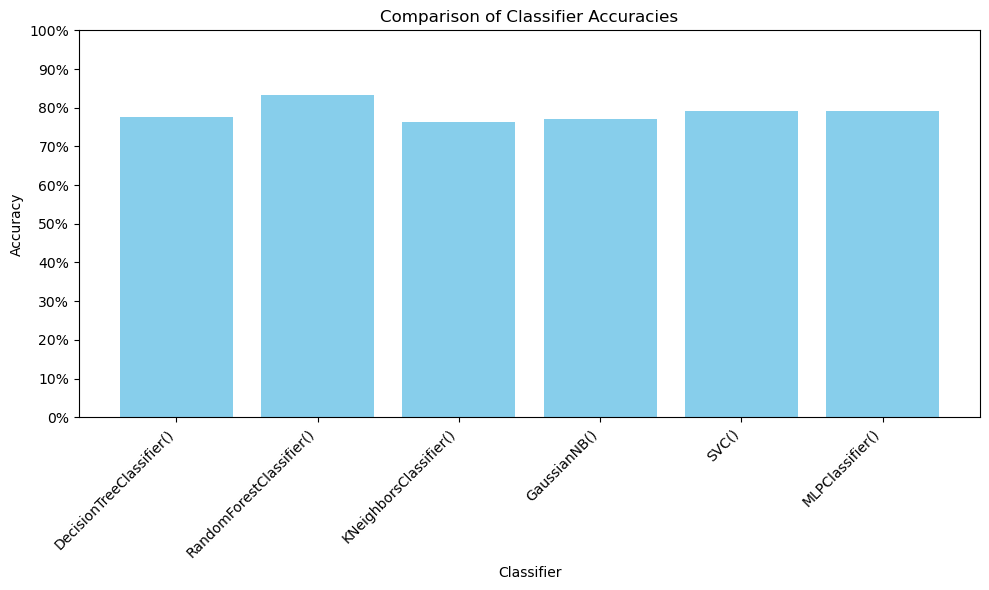

In [ ]:
# Ensure that models contains single string values
models = [str(model) for model in performance_Accuracy.keys()]

# Extract accuracies
accuracies = list(performance_Accuracy.values())

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Set y-axis limits and ticks
plt.ylim(0, 1.0)  # Set the y-axis limits
plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks from 0 to 1 with step 0.1
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in np.arange(0, 1.1, 0.1)])  # Format y-axis ticks as percentages

plt.tight_layout()
plt.show()


# **6-- Appliquez la validation croisée pour évaluer la stabilité des modèles.**




In [ ]:
import time

def cross_validation_with_time(X, y, model2, cv):
    """
    Parameters:
        X: Features .
        y : Target or class.
        cv : Determines the cross-validation splitting strategy.
    """

    # Start timing
    start_time = time.time()

    # Calculate cross-validation scores
    cv_scores = cross_val_score(model2, X, y, cv=cv)


    # Calculate average score across all folds
    avg = np.mean(cv_scores)

    # End timing
    end_time = time.time()

    # Calculate time taken
    cv_time = end_time - start_time

    # Print average score and time
    print("All Scores :", cv_scores)

    # Print average score and time
    print("Average Score:", avg)
    print("Time taken for cross-validation:", cv_time)

In [ ]:
#separating  the  features and

x_full = dataset[["NDVI", "LST", "BURNED_AREA"]]
y_full = dataset["CLASS"]

# Scale features
scaler = StandardScaler()
x_full = scaler.fit_transform(x_full)



X_train, X_test, Y_train, Y_test = train_test_split(x_full, y_full,test_size=0.25,random_state=42,shuffle=True)

### **A- Arbres de décision (J48)**

In [ ]:
# Define KFold cross-validation with 5 splits
k_folds = KFold(n_splits=5)

#create model
DecisionTree_cross = DecisionTreeClassifier()

# Perform cross-validation and get average score and time
cross_validation_with_time(x_full,y_full,DecisionTree_cross,k_folds)

All Scores : [0.79883382 0.81632653 0.81049563 0.78362573 0.78070175]
Average Score: 0.7979966924113004
Time taken for cross-validation: 0.055619239807128906


### **B- Forêts aléatoires (Random Forest)**

In [ ]:
# Perform cross-validation and get average score and time
RandomForest_cross = RandomForestClassifier()
cross_validation_with_time(x_full,y_full,RandomForest_cross,k_folds)

All Scores : [0.8483965  0.8483965  0.85131195 0.84210526 0.83333333]
Average Score: 0.8447087105518898
Time taken for cross-validation: 2.0820817947387695


### **C- k plus proches voisins (k-NN)**

In [ ]:
# Perform cross-validation and get average score and times
kNN_cross = KNeighborsClassifier()
cross_validation_with_time(x_full,y_full, kNN_cross, k_folds)

All Scores : [0.7755102  0.75801749 0.79591837 0.80994152 0.74269006]
Average Score: 0.7764155286174621
Time taken for cross-validation: 0.1338200569152832


### **D- Naive Bayes**

In [ ]:
# Perform cross-validation and get average score and times
NaiveBayes_cross=GaussianNB()
cross_validation_with_time(x_full,y_full, NaiveBayes_cross, k_folds)

All Scores : [0.78134111 0.75218659 0.7696793  0.78654971 0.79532164]
Average Score: 0.7770156684227575
Time taken for cross-validation: 0.013504266738891602


### **E -Machines à vecteurs de support (SVM)**

In [ ]:
# Perform cross-validation and get average score and times
SVM_cross = SVC()
cross_validation_with_time(x_full,y_full, SVM_cross, k_folds)

All Scores : [0.79008746 0.75218659 0.78717201 0.80409357 0.78947368]
Average Score: 0.7846026631203861
Time taken for cross-validation: 0.42667126655578613


### **F -Réseaux de neurones artificiels (Multilayer Perceptron)**

In [ ]:
# Perform cross-validation and get average score and times
MLP_cross= MLPClassifier()
cross_validation_with_time(x_full,y_full, MLP_cross, k_folds)

C:\Users\smi\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smi\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smi\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


All Scores : [0.79591837 0.76676385 0.80758017 0.80409357 0.80701754]
Average Score: 0.796274700356333
Time taken for cross-validation: 4.842599630355835


C:\Users\smi\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## **7- Perform a setting of the hyperparameter of each algorithm**

### **A- Arbres de décision (J48)**

In [ ]:
# Define the models
DecisionTree_grid = DecisionTreeClassifier()

In [ ]:
# Define hyperparameters grid for each model
param_grid_DecisionTree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10,30],
    'min_samples_split': [2, 10,50],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 30,40,50],
    'min_impurity_decrease': [ 0.1, 0.2],
    'splitter': ['best', 'random'],
}

In [ ]:
# Create GridSearchCV object
DecisionTree_grid_model = GridSearchCV(DecisionTree_grid, param_grid_DecisionTree, cv=5)

In [ ]:
# Fit the grid search to the data
DecisionTree_grid_model.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = DecisionTree_grid_model.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
grid_predictions_DecisionTree= DecisionTree_grid_model.predict(X_test)
# print classification report
print(classification_report(Y_test,grid_predictions_DecisionTree))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89       341
           1       0.00      0.00      0.00        88

    accuracy                           0.79       429
   macro avg       0.40      0.50      0.44       429
weighted avg       0.63      0.79      0.70       429



C:\Users\smi\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smi\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smi\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cf_matrix_DecisionTree = confusion_matrix(Y_test,grid_predictions_DecisionTree)
print(cf_matrix_DecisionTree, end ='\n ')

accuracy_score(Y_test,grid_predictions_DecisionTree)

[[341   0]
 [ 88   0]]
 

0.7948717948717948

### **B- Forêts aléatoires (Random Forest)**

In [ ]:
# Define the models
RandomForest_grid = RandomForestClassifier()

In [ ]:
# Define hyperparameters grid for each model

param_grid_RandomForest = {
         'n_estimators': [None,100],
         'criterion': ['gini', 'entropy'],
         'max_features': ['sqrt', 'log2'],



   #### 'n_estimators': [100],
      ###  'criterion': ['gini'],
      #  'max_depth': [None, 10, 20],
     ##   'min_weight_fraction_leaf': [0.0],
      #  'max_features': [ 'log2'],
      #  'max_leaf_nodes': [None, 10],
      ##  'min_impurity_decrease': [0.0, 0.1],    84.04
       # 'bootstrap': [True, False],
       # 'oob_score': [True, False],
       # 'class_weight': [None, 'balanced', 'balanced_subsample']



   # 'n_estimators': [None,100],
   # 'criterion': ['gini', 'entropy'],
   # 'max_features': ['sqrt', 'log2'],


#'n_estimators': [50, 100],
 #   'criterion': ['gini', 'entropy'],
 #   'min_samples_split': [5,2,0,9],
  #  'min_samples_leaf': [5,2,0,9],
  #  'max_features': ['sqrt', 'log2', None], 83.46
}

In [ ]:
# Create GridSearchCV object
grid_RandomForest_model = GridSearchCV(RandomForest_grid, param_grid_RandomForest, cv=5)

In [ ]:
# Fit the grid search to the data
grid_RandomForest_model.fit(X_train, Y_train)

# Get the best hyperparameters
best_param_RandomForest = grid_RandomForest_model.best_params_
print("Best Hyperparameters:", best_param_RandomForest)

C:\Users\smi\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\smi\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\smi\anaconda4\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\smi\anaconda4\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\smi\anaconda4\Lib\site-packages\sklearn\ut

Best Hyperparameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
grid_predictions_RandomForest= grid_RandomForest_model.predict(X_test)
# print classification report
print(classification_report(Y_test,grid_predictions_RandomForest))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       341
           1       0.72      0.44      0.55        88

    accuracy                           0.85       429
   macro avg       0.80      0.70      0.73       429
weighted avg       0.84      0.85      0.84       429



In [ ]:
cf_matrix_RandomForest = confusion_matrix(Y_test,grid_predictions_RandomForest)
print(cf_matrix_RandomForest, end ='\n ')

accuracy_score(Y_test,grid_predictions_RandomForest)

[[326  15]
 [ 49  39]]
 

0.8508158508158508

### **C- k plus proches voisins (k-NN)**

In [ ]:
# Define the models
kNN_grid = KNeighborsClassifier()

In [ ]:
# Define hyperparameters grid for each model

param_grid_kNN = {
    'n_neighbors': [3, 5, 7, 6,8,9, 11,13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [ ]:
# Create GridSearchCV object
grid_kNN_model = GridSearchCV(kNN_grid, param_grid_kNN, cv=5)

In [ ]:
# Fit the grid search to the data
grid_kNN_model.fit(X_train, Y_train)

# Get the best hyperparameters
best_param_kNN = grid_kNN_model.best_params_
print("Best Hyperparameters:", best_param_kNN)

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [ ]:
grid_predictions_kNN= grid_kNN_model.predict(X_test)
# print classification report
print(classification_report(Y_test,grid_predictions_kNN))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       341
           1       0.66      0.35      0.46        88

    accuracy                           0.83       429
   macro avg       0.76      0.65      0.68       429
weighted avg       0.81      0.83      0.81       429



In [ ]:
cf_matrix_kNN = confusion_matrix(Y_test,grid_predictions_kNN)
print(cf_matrix_kNN, end ='\n ')

accuracy_score(Y_test,grid_predictions_kNN)

[[325  16]
 [ 57  31]]
 

0.8298368298368298

### **D -Machines à vecteurs de support (SVM)**

In [ ]:
# Define the models
SVM_grid = SVC()

In [ ]:
# Define hyperparameters grid for each model

param_grid_SVM = {
    'C': [0.1,20,100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale'],
}

In [ ]:
# Create GridSearchCV object
grid_SVM_model = GridSearchCV(SVM_grid, param_grid_SVM , cv=5)

In [ ]:
# Fit the grid search to the data
grid_SVM_model.fit(X_train, Y_train)

# Get the best hyperparameters
best_param_SVM = grid_SVM_model.best_params_
print("Best Hyperparameters:", best_param_SVM)

Best Hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
grid_predictions_SVM= grid_SVM_model.predict(X_test)
# print classification report
print(classification_report(Y_test,grid_predictions_SVM))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       341
           1       0.58      0.12      0.21        88

    accuracy                           0.80       429
   macro avg       0.70      0.55      0.55       429
weighted avg       0.76      0.80      0.75       429



In [ ]:
cf_matrix_SVM = confusion_matrix(Y_test,grid_predictions_SVM)
print(cf_matrix_SVM, end ='\n ')

accuracy_score(Y_test,grid_predictions_SVM)

[[333   8]
 [ 77  11]]
 

0.8018648018648019

### **E -Réseaux de neurones artificiels (Multilayer Perceptron)** **bold text**

In [ ]:
# Define the models
MLP_grid= MLPClassifier()

In [ ]:
# Define hyperparameters grid for each model
param_grid_MLP = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],

    'alpha': [0.0001, 0.001, 0.01],

}

In [ ]:
# Create GridSearchCV object
grid_MLP_model = GridSearchCV(MLP_grid, param_grid_MLP, cv=5)

In [ ]:
# Fit the grid search to the data
grid_MLP_model.fit(X_train, Y_train)

# Get the best hyperparameters
best_param_MLP = grid_MLP_model.best_params_
print("Best Hyperparameters:", best_param_MLP)

C:\Users\smi\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smi\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smi\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smi\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smi\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perc

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}


C:\Users\smi\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
grid_predictions_MLP= grid_MLP_model.predict(X_test)
# print classification report
print(classification_report(Y_test,grid_predictions_MLP))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       341
           1       0.50      0.17      0.25        88

    accuracy                           0.79       429
   macro avg       0.66      0.56      0.57       429
weighted avg       0.75      0.79      0.75       429



In [ ]:
cf_matrix_MLP = confusion_matrix(Y_test,grid_predictions_MLP)
print(cf_matrix_MLP, end ='\n ')

accuracy_score(Y_test,grid_predictions_MLP)

[[326  15]
 [ 73  15]]
 

0.7948717948717948

## 8- Compare the performance of the models before and after the optimization of the hyperparameters.

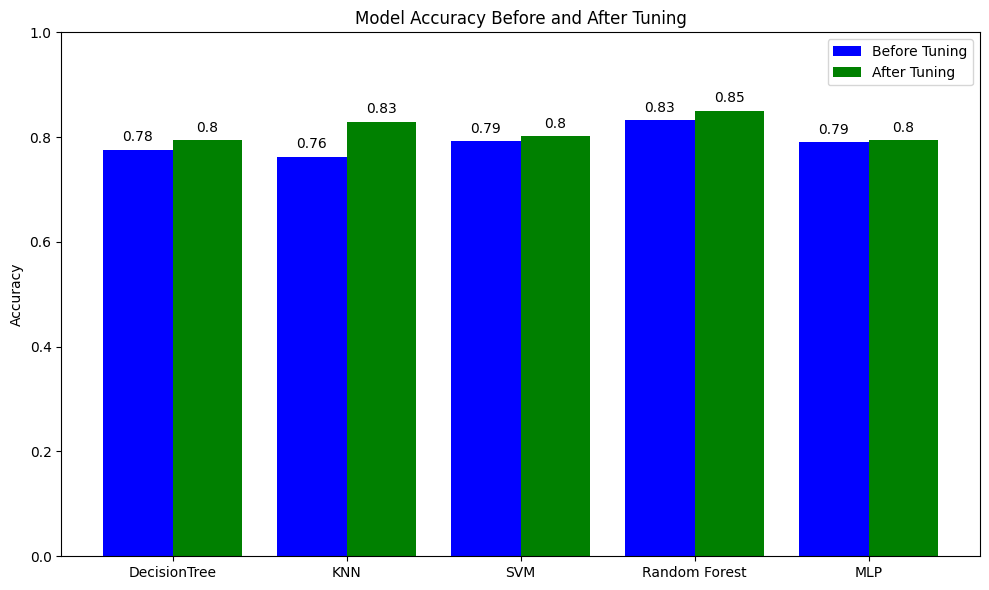

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Model names and their scores before and after tuning
models_scores = {
    'DecisionTree': {'Before tuning':0.776 , 'After tuning': 0.795},
    'KNN': {'Before tuning':0.7626 , 'After tuning': 0.8298},
    'SVM': {'Before tuning':0.7918 , 'After tuning': 0.802},
    'Random Forest': {'Before tuning':0.8326 , 'After tuning':0.8508},
    'MLP': {'Before tuning': 0.791, 'After tuning': 0.795}
}



# Extract model names and scores
model_names = list(models_scores.keys())
scores_before = [models_scores[model]['Before tuning'] for model in model_names]
scores_after = [models_scores[model]['After tuning'] for model in model_names]

# Plotting
plt.figure(figsize=(10, 6))

# Plot scores before tuning
bars_before = plt.bar(np.arange(len(model_names)) - 0.2, scores_before, width=0.4, label='Before Tuning', color='b')

# Plot scores after tuning
bars_after = plt.bar(np.arange(len(model_names)) + 0.2, scores_after, width=0.4, label='After Tuning', color='g')

# Adding text annotations
for bar in bars_before:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

for bar in bars_after:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Adding labels and titles
plt.xticks(np.arange(len(model_names)), model_names)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Before and After Tuning')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()